**Exercise 9.11**.  Simulate an MA(1) process with $\theta = 0.6$ and $\mu = 100$.  Simulate 36 values but set aside the last 4 values to compare forecasts to actual values.

**(a)** Using the first 32 values of the series, find the values for the maximum likelihood estimates of the $\theta$ and $\mu$.

**(b)** Using the estimated model, forecast the next four values of the series. Plot the series together with the four forecasts. Place a horizontal line at the estimate of the process mean.

**(c)** Compare the four forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits. Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and same sample size.

**Solution**.

In [1]:
require(ggplot2)

Loading required package: ggplot2



In [2]:
set.seed(2000)
Y = arima.sim(model=list(ma=c(-0.6)), n=36) + 100

**(a)**

In [3]:
model = arima(Y[1:32], order=c(0, 0, 1), method='ML')
print(model)


Call:
arima(x = Y[1:32], order = c(0, 0, 1), method = "ML")

Coefficients:
          ma1  intercept
      -0.4871   100.0268
s.e.   0.1812     0.1029

sigma^2 estimated as 1.212:  log likelihood = -48.62,  aic = 103.23


**(b)**

In [4]:
pred = predict(model, n.ahead=4, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

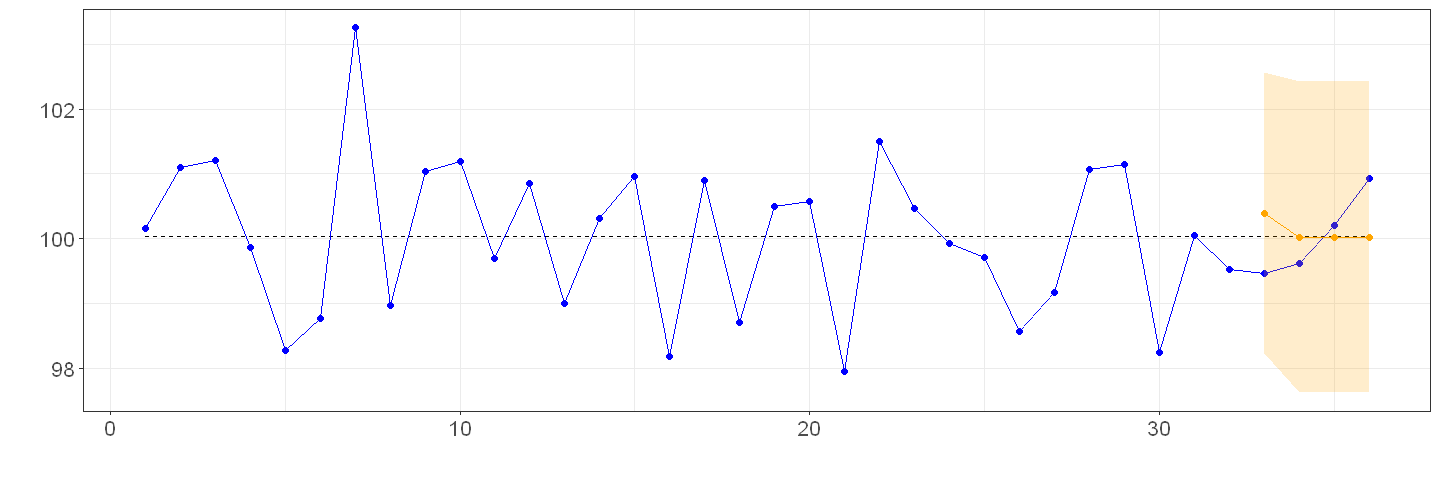

In [5]:
options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

**(c)** The actual values are within the predicted values -- also note that the predictions are just the process mean beyond the first lag.

**(d)**  See (b).

**(e)**


Call:
arima(x = Y[1:32], order = c(0, 0, 1), method = "ML")

Coefficients:
          ma1  intercept
      -1.0000   100.0348
s.e.   0.1183     0.0115

sigma^2 estimated as 0.3966:  log likelihood = -32.36,  aic = 70.72


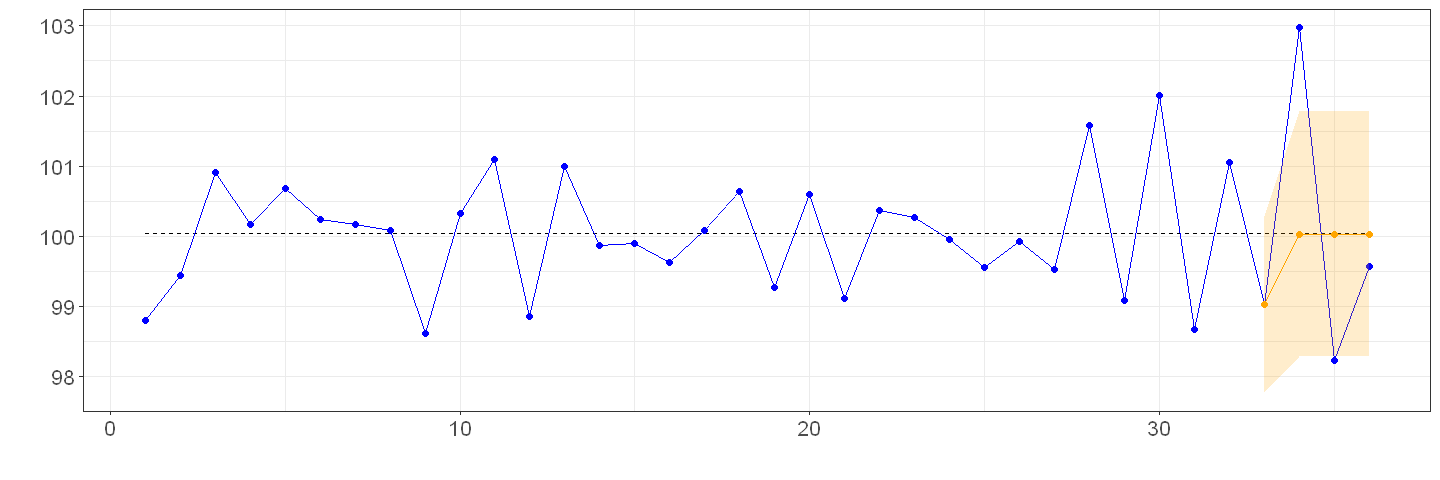

In [6]:
set.seed(2001)
Y = arima.sim(model=list(ma=c(-0.6)), n=36) + 100

model = arima(Y[1:32], order=c(0, 0, 1), method='ML')
print(model)

pred = predict(model, n.ahead=4, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

Some of the values seem to be outside of the confidence range -- and they also seem to disagree with most of the process.

**Exercise 9.12**.  Simulate an MA(2) process with $\theta_1 = 1$, $\theta_2 = −0.6$, and $\mu = 100$.  Simulate 36 values but set aside the last 4 values with compare forecasts to actual values.

**(a)** Using the first 32 values of the series, find the values for the maximum likelihood estimates of the $\theta$'s and $\mu$.

**(b)** Using the estimated model, forecast the next four values of the series.  Plot the series together with the four forecasts. Place a horizontal line at the estimate of the process mean.

**(c)** What is special about the forecasts at lead times 3 and 4?

**(d)** Compare the four forecasts with the actual values that you set aside.

**(e)** Plot the forecasts together with 95% forecast limits. Do the actual values fall within the forecast limits?

**(f)** Repeat parts (a) through (e) with a new simulated series using the same values
of the parameters and same sample size.

**Solution**.

In [7]:
set.seed(2000)
Y = arima.sim(model=list(ma=c(-1, 0.6)), n=36) + 100

**(a)**

In [8]:
model = arima(Y[1:32], order=c(0, 0, 2), method='ML')
print(model)


Call:
arima(x = Y[1:32], order = c(0, 0, 2), method = "ML")

Coefficients:
          ma1     ma2  intercept
      -0.9917  0.6122    99.9926
s.e.   0.1996  0.1752     0.1136

sigma^2 estimated as 1.085:  log likelihood = -47.42,  aic = 102.83


**(b)**

In [9]:
pred = predict(model, n.ahead=4, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

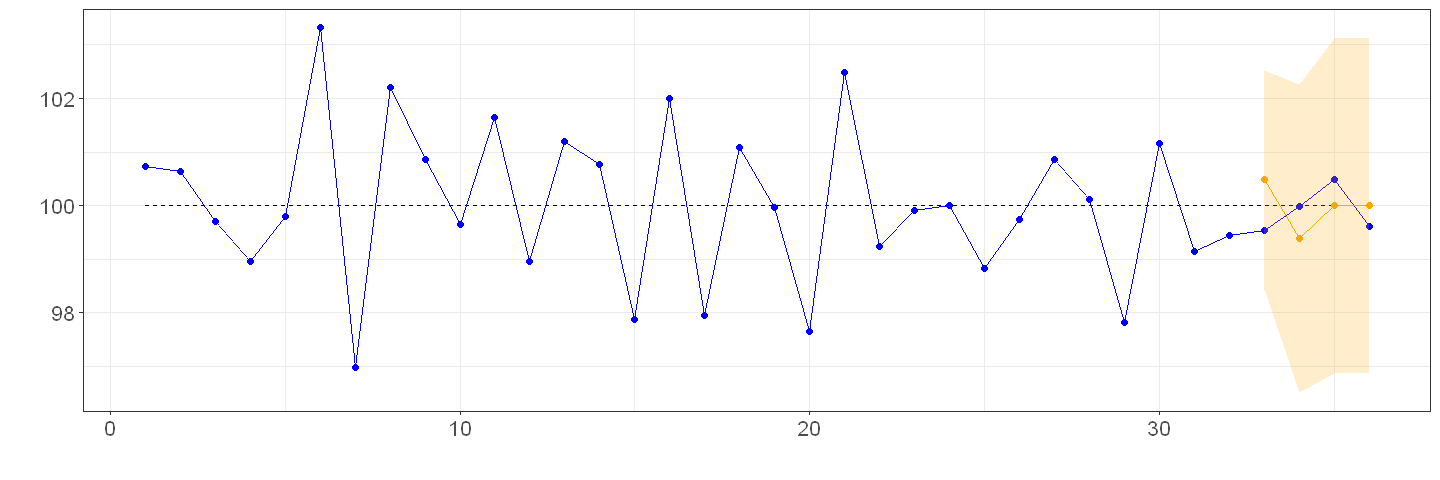

In [10]:
options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

**(c, d, e)** The values are within the confidence interval.  The predicted values past lag 2 are the process mean.

**(f)**


Call:
arima(x = Y[1:32], order = c(0, 0, 2), method = "ML")

Coefficients:
          ma1     ma2  intercept
      -1.0840  0.7097   100.0983
s.e.   0.1407  0.1626     0.0650

sigma^2 estimated as 0.3526:  log likelihood = -29.69,  aic = 67.37


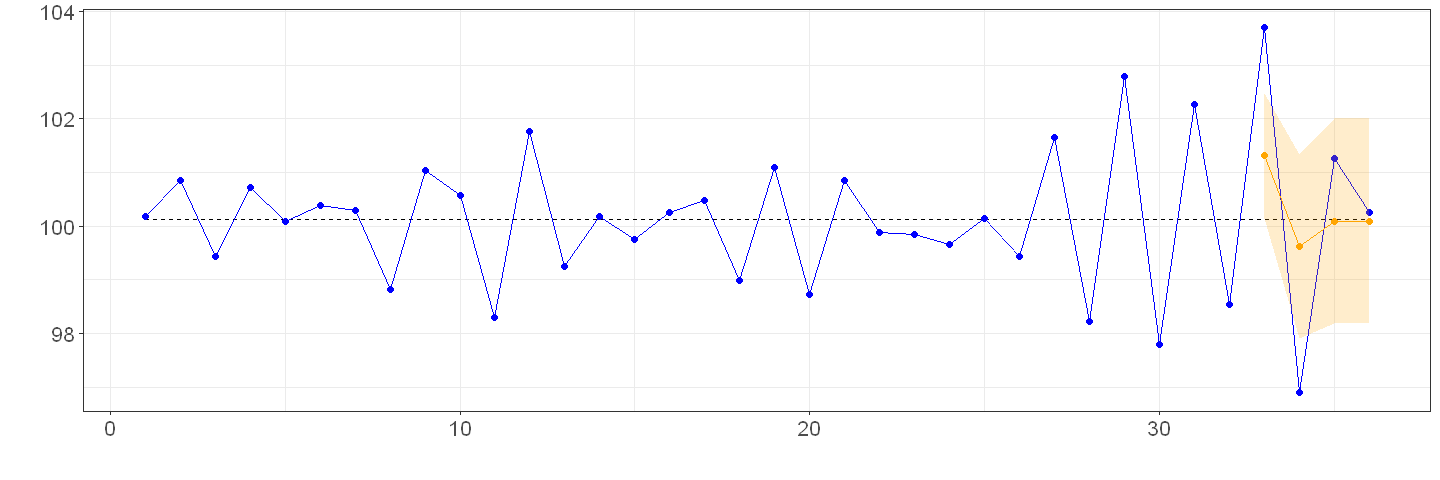

In [11]:
set.seed(2001)
Y = arima.sim(model=list(ma=c(-1, 0.6)), n=36) + 100

model = arima(Y[1:32], order=c(0, 0, 2), method='ML')
print(model)

pred = predict(model, n.ahead=4, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

Once again, a few of the values seem like outliers -- and disagree with the remainder of the process.

**Exercise 9.13**. Simulate an ARMA(1,1) process with $\phi = 0.7$, $\theta = −0.5$, and $\mu = 100$.  Simulate 50 values but set aside the last 10 values to compare forecasts with actual values.

**(a)** Using the first 40 values of the series, find the values for the maximum likelihood estimates of $\phi$, $\theta$, and $\mu$.

**(b)** Using the estimated model, forecast the next ten values of the series.  Plot the series together with the ten forecasts. Place a horizontal line at the estimate of the process mean.

**(c)** Compare the ten forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits.  Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and same sample size.

**Solution**.

In [12]:
set.seed(2000)
Y = arima.sim(model=list(ar=c(0.7), ma=c(0.5)), n=50) + 100

**(a)**

In [13]:
model = arima(Y[1:40], order=c(1, 0, 1), method='ML')
print(model)


Call:
arima(x = Y[1:40], order = c(1, 0, 1), method = "ML")

Coefficients:
         ar1     ma1  intercept
      0.6892  0.6600    99.3218
s.e.  0.1149  0.1109     0.6671

sigma^2 estimated as 0.7041:  log likelihood = -50.73,  aic = 109.45


**(b)**

In [14]:
pred = predict(model, n.ahead=10, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

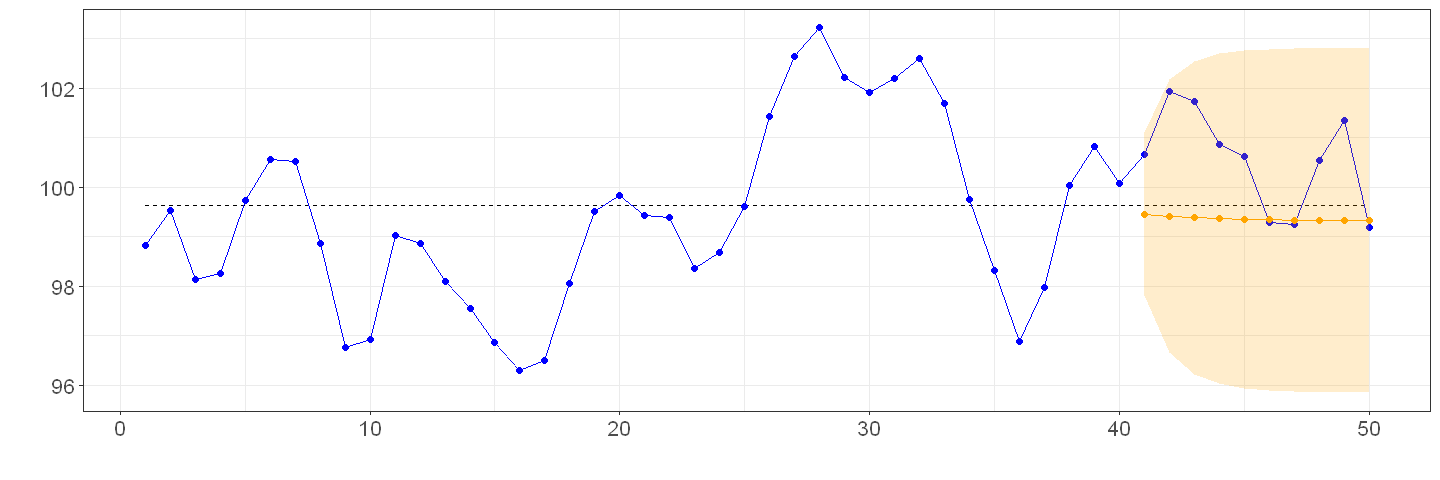

In [15]:
options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

**(c)**  The actual values all fall within the confidence interval.

**(d)**  See (b).

**(e)**


Call:
arima(x = Y[1:40], order = c(1, 0, 1), method = "ML")

Coefficients:
         ar1     ma1  intercept
      0.7697  0.3700   100.2685
s.e.  0.1059  0.1654     0.8813

sigma^2 estimated as 1.032:  log likelihood = -58.17,  aic = 124.34


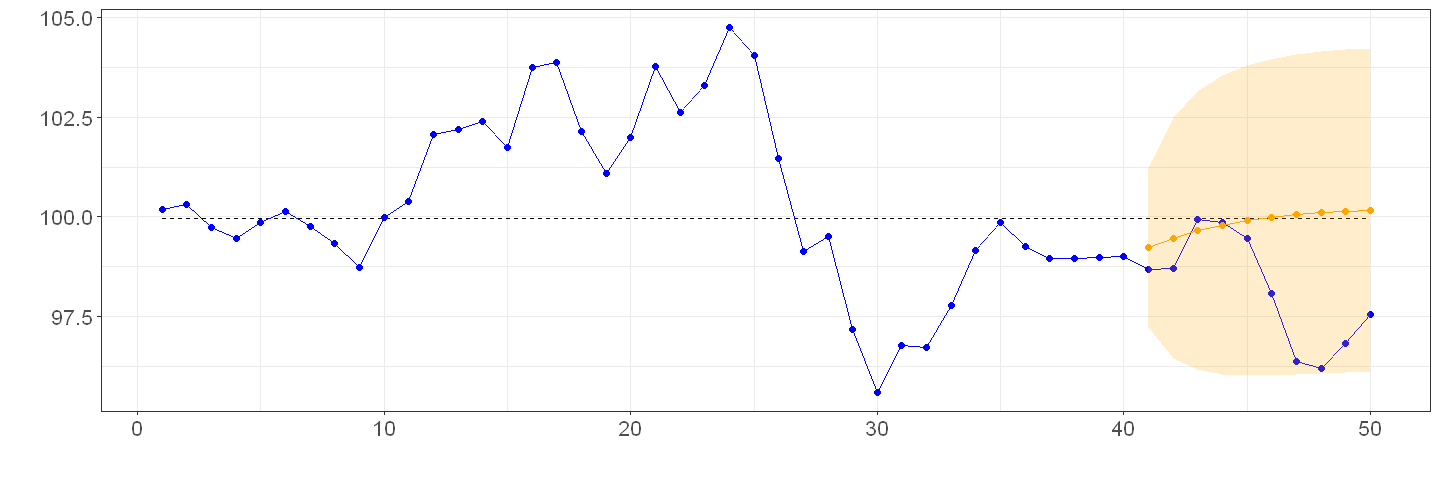

In [16]:
set.seed(2001)
Y = arima.sim(model=list(are=c(0.7), ma=c(0.5)), n=50) + 100

model = arima(Y[1:40], order=c(1, 0, 1), method='ML')
print(model)

pred = predict(model, n.ahead=10, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

All of the actual values fall within the confidence interval for the prediction.

**Exercise 9.14**.  Simulate an IMA(1,1) process with $\theta = 0.8$ and $\theta_0 = 0$. Simulate 35 values, but set aside the last five values to compare forecasts with actual values.

**(a)** Using the first 30 values of the series, find the value for the maximum likelihood estimate of $\theta$.

**(b)** Using the estimated model, forecast the next five values of the series.  Plot the series together with the five forecasts.  What is special about the forecasts?

**(c)** Compare the five forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits.  Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and same sample size.

**Solution**.

In [17]:
set.seed(2000)
Y = arima.sim(model=list(ma=c(-0.8), order=c(0,1,1)), n=35)[-1]

**(a)**

In [18]:
model = arima(Y[1:30], order=c(0, 1, 1), method='ML')
print(model)


Call:
arima(x = Y[1:30], order = c(0, 1, 1), method = "ML")

Coefficients:
          ma1
      -0.8125
s.e.   0.1825

sigma^2 estimated as 1.242:  log likelihood = -44.83,  aic = 93.67


**(b)**

In [19]:
pred = predict(model, n.ahead=5, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

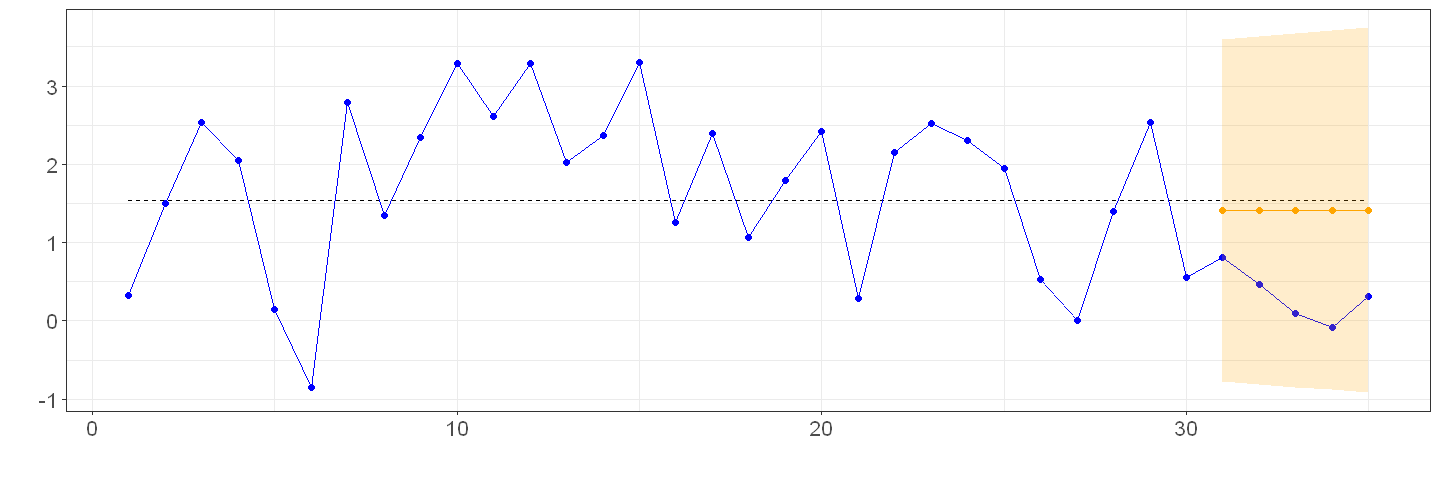

In [20]:
options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs + 1
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

**(c)**  Actual values are within forecast interval.

**(d)**  See (b).

**(e)**


Call:
arima(x = Y[1:30], order = c(0, 1, 1), method = "ML")

Coefficients:
          ma1
      -0.8248
s.e.   0.1120

sigma^2 estimated as 1.637:  log likelihood = -48.86,  aic = 101.72


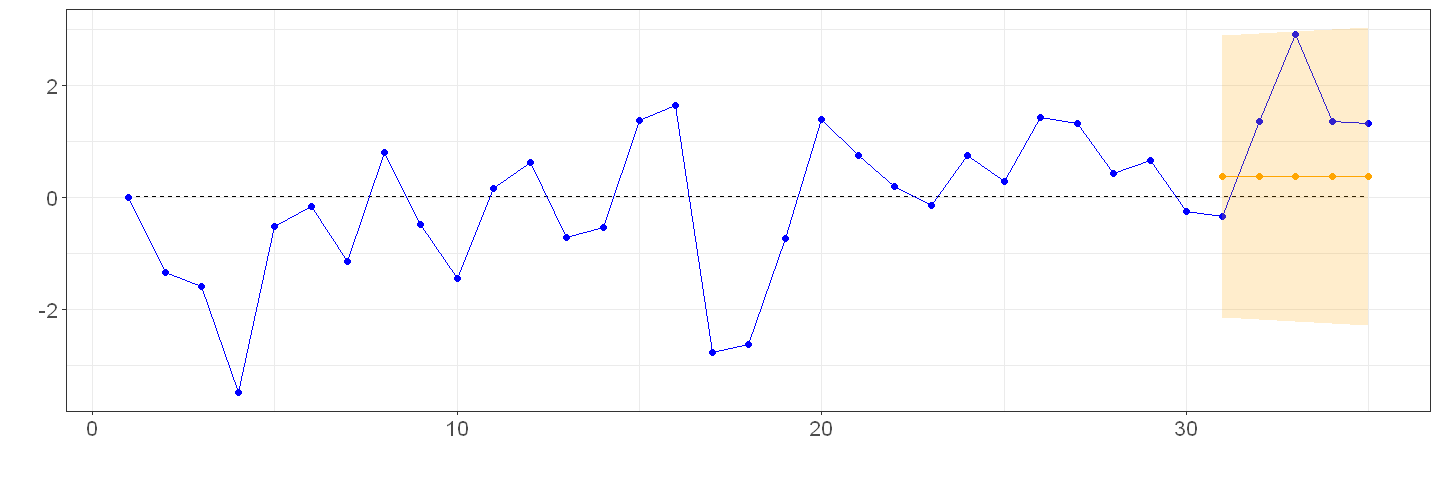

In [21]:
set.seed(2020)
Y = arima.sim(model=list(ma=c(-0.8), order=c(0,1,1)), n=35)[-1]

model = arima(Y[1:30], order=c(0, 1, 1), method='ML')
print(model)

pred = predict(model, n.ahead=5, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs + 1
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

Actual values are within forecast interval.

**Exercise 9.15**.  Simulate an IMA(1,1) process with $\theta = 0.8$ and $\theta_0 = 10$.  Simulate 35 values, but set aside the last five values to compare forecasts to actual values.

**(a)** Using the first 30 values of the series, find the values for the maximum likelihood estimates of $\theta$ and $\theta_0$.

**(b)** Using the estimated model, forecast the next five values of the series. Plot the
series together with the five forecasts. What is special about these forecasts?

**(c)** Compare the five forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits. Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and same sample size

**Solution**.

In [22]:
set.seed(2000)
Y = arima.sim(model=list(ma=c(-0.8), order=c(0,1,1)), n=35)[-1] + cumsum(rep(10, 35))

**(a)**

In [23]:
model = arima(Y[1:30], order=c(0, 1, 1), xreg=1:30, method='ML')
print(model)


Call:
arima(x = Y[1:30], order = c(0, 1, 1), xreg = 1:30, method = "ML")

Coefficients:
          ma1    1:30
      -0.8134  9.9985
s.e.   0.1855  0.0465

sigma^2 estimated as 1.242:  log likelihood = -44.83,  aic = 95.67


**(b)**

In [24]:
pred = predict(model, n.ahead=5, se.fit=TRUE, newxreg=31:35)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

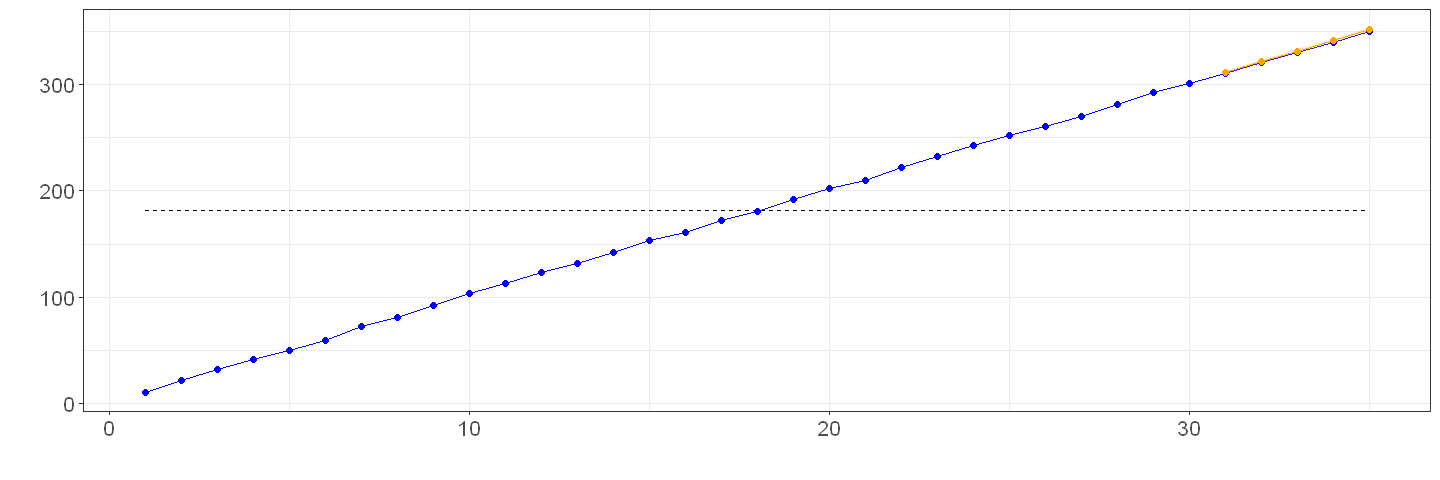

In [25]:
options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs + 1
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

**(c)**  The trend dominates the series.

**(d)**  See (b).

**(e)**


Call:
arima(x = Y[1:30], order = c(0, 1, 1), xreg = 1:30, method = "ML")

Coefficients:
          ma1     1:30
      -1.0000  10.0652
s.e.   0.0939   0.0244

sigma^2 estimated as 1.333:  log likelihood = -47.01,  aic = 100.03


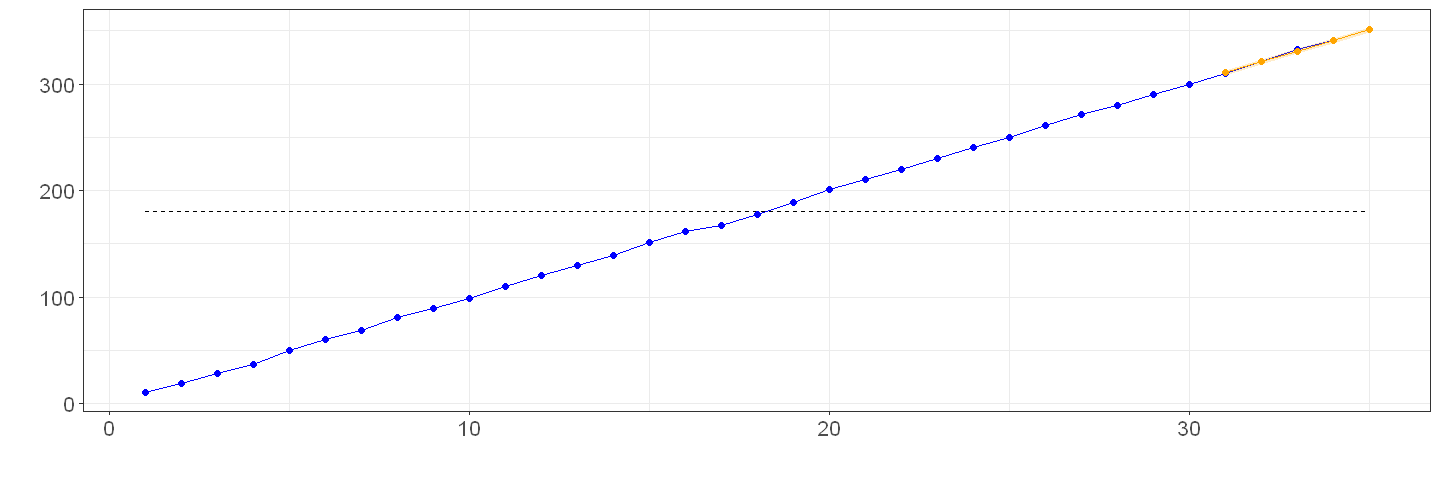

In [26]:
set.seed(2020)
Y = arima.sim(model=list(ma=c(-0.8), order=c(0,1,1)), n=35)[-1] + cumsum(rep(10, 35))

model = arima(Y[1:30], order=c(0, 1, 1), xreg=1:30, method='ML')
print(model)

pred = predict(model, n.ahead=5, se.fit=TRUE, newxreg=31:35)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs + 1
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

The trend, again, dominates the series.

For illustrative purposes, here's the same exercise with a trend $\theta_0 = 1$:


Call:
arima(x = Y[1:30], order = c(0, 1, 1), xreg = 1:30, method = "ML")

Coefficients:
          ma1    1:30
      -1.0000  1.0652
s.e.   0.0939  0.0244

sigma^2 estimated as 1.333:  log likelihood = -47.01,  aic = 100.03


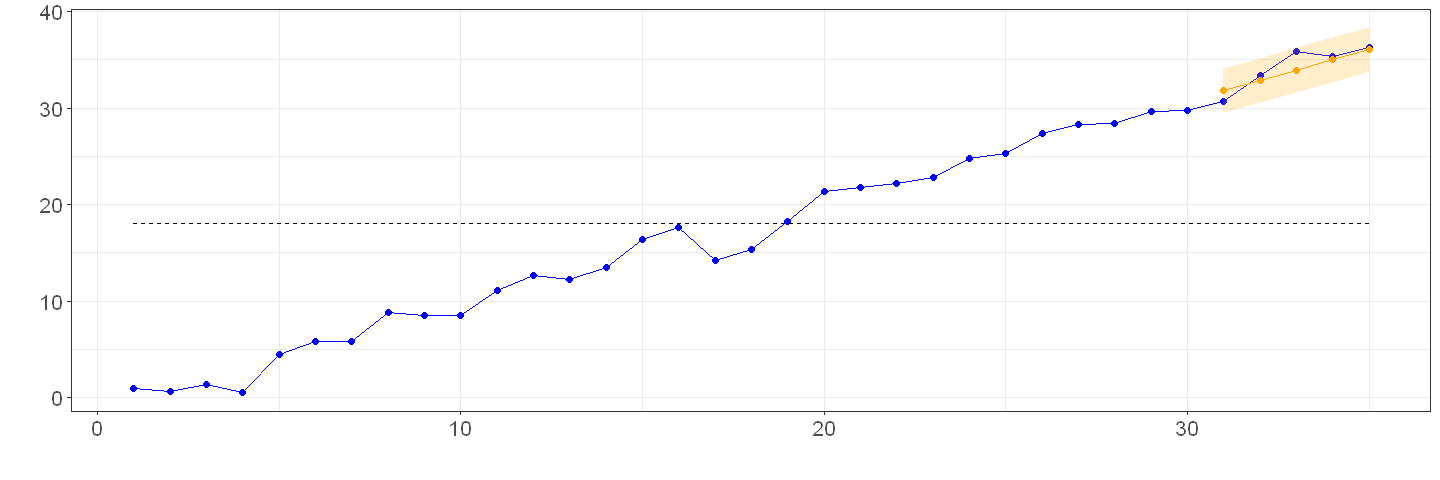

In [27]:
set.seed(2020)
Y = arima.sim(model=list(ma=c(-0.8), order=c(0,1,1)), n=35)[-1] + cumsum(rep(1, 35))

model = arima(Y[1:30], order=c(0, 1, 1), xreg=1:30, method='ML')
print(model)

pred = predict(model, n.ahead=5, se.fit=TRUE, newxreg=31:35)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs + 1
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

**Exercise 9.16**. Simulate an IMA(2,2) process with $\theta_1 = 1$, $\theta_2 = −0.75$, and $\theta_0 = 0$.  Simulate 45 values, but set aside the last five values to compare forecasts with actual values.

**(a)** Using the first 40 values of the series, find the value for the maximum likelihood estimate of $\theta_1$ and $\theta_2$.

**(b)** Using the estimated model, forecast the next five values of the series.  Plot the series together with the five forecasts. What is special about the forecasts?

**(c)** Compare the five forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits. Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and same sample size.

**Solution**.

In [28]:
set.seed(2000)
Y = arima.sim(model=list(ma=c(-1, 0.75), order=c(0, 2, 2)), n=45)[-2:-1]

**(a)**

In [29]:
model = arima(Y[1:40], order=c(0, 2, 2), method='ML')
print(model)


Call:
arima(x = Y[1:40], order = c(0, 2, 2), method = "ML")

Coefficients:
          ma1     ma2
      -0.9305  0.7271
s.e.   0.1182  0.1117

sigma^2 estimated as 0.9301:  log likelihood = -53.47,  aic = 112.93


**(b)**

In [30]:
pred = predict(model, n.ahead=5, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

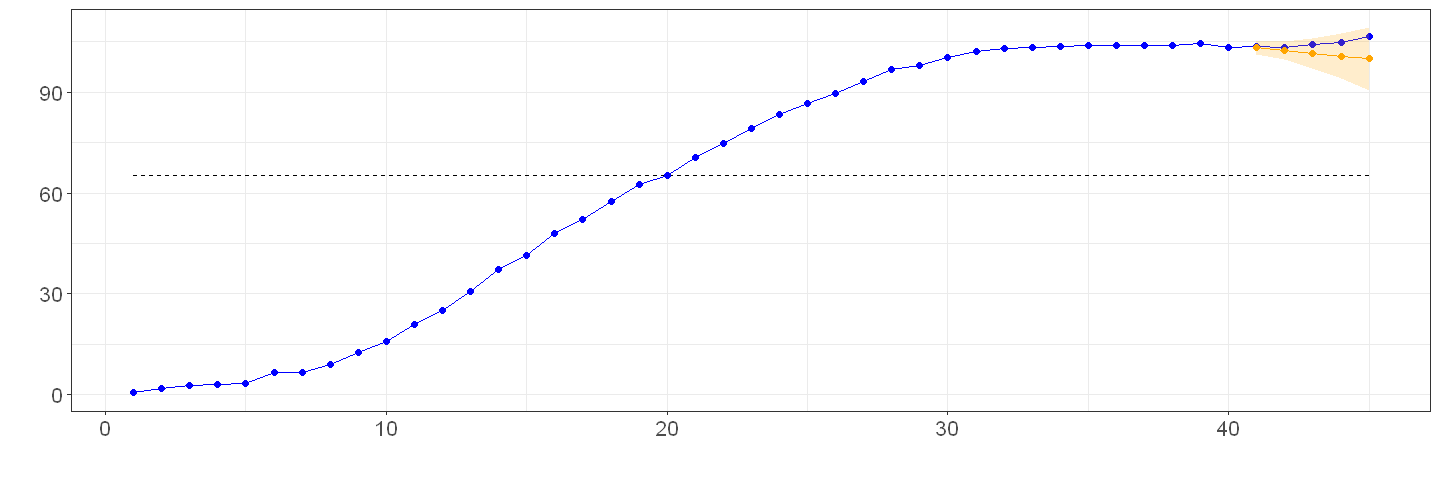

In [31]:
options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs + 2
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

The forecast predicts decrease growth, while the actual values start to increase again.  The actual values are still within the confidence interval of the forecast.

**(e)**


Call:
arima(x = Y[1:40], order = c(0, 2, 2), method = "ML")

Coefficients:
          ma1     ma2
      -0.9691  0.5480
s.e.   0.1955  0.2213

sigma^2 estimated as 1.178:  log likelihood = -57.63,  aic = 121.26


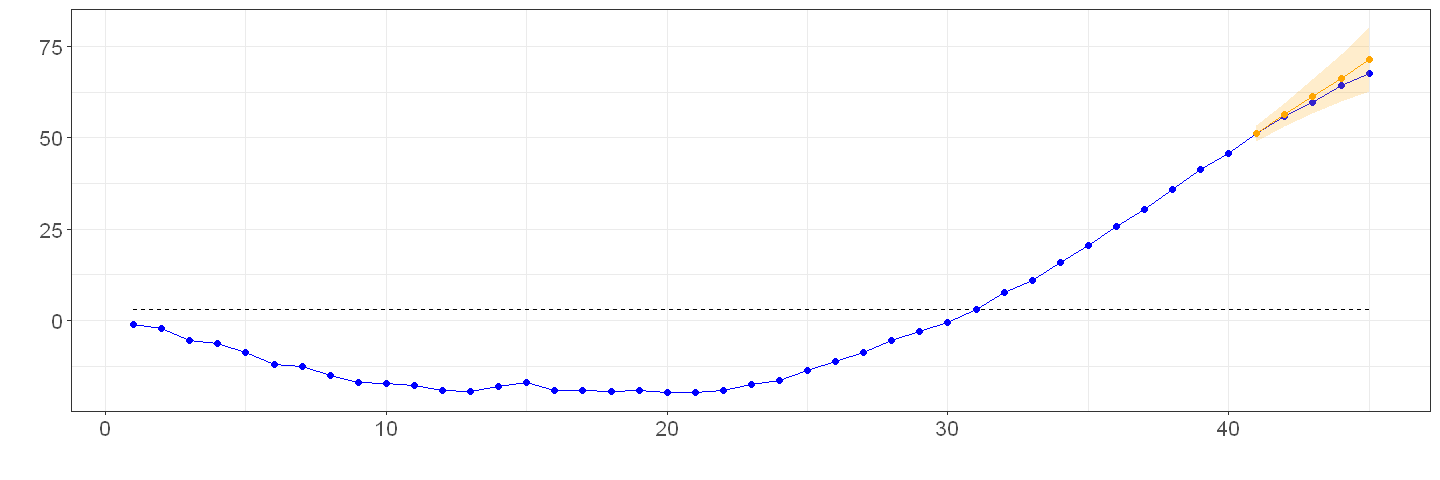

In [32]:
set.seed(2020)
Y = arima.sim(model=list(ma=c(-1, 0.75), order=c(0, 2, 2)), n=45)[-2:-1]

model = arima(Y[1:40], order=c(0, 2, 2), method='ML')
print(model)

pred = predict(model, n.ahead=5, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs + 2
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

The actual values are still within confidence interval.

**Exercise 9.17**.  Simulate an IMA(2,2) process with $\theta_1 = 1$, $\theta_2 = −0.75$, and $\theta_0 = 10$.  Simulate 45 values, but set aside the last five values to compare forecasts with actual values.

**(a)** Using the first 40 values of the series, find the values for the maximum likelihood estimates of $\theta_1$, $\theta_2$, and $\theta_0$.

**(b)** Using the estimated model, forecast the next five values of the series. Plot the series together with the five forecasts. What is special about these forecasts?

**(c)** Compare the five forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits. Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and same sample size.

**Solution**.

In [33]:
set.seed(2000)
Y = arima.sim(model=list(ma=c(-1, 0.75), order=c(0, 2, 2)), n=45)[-2:-1] + 10 * (1:45)**2

**(a)**

In [34]:
model = arima(Y[1:40], order=c(0, 2, 2), xreg=(1:40)**2, method='ML')
print(model)


Call:
arima(x = Y[1:40], order = c(0, 2, 2), xreg = (1:40)^2, method = "ML")

Coefficients:
          ma1     ma2  (1:40)^2
      -0.9324  0.7275     9.977
s.e.   0.1187  0.1119     0.061

sigma^2 estimated as 0.9266:  log likelihood = -53.4,  aic = 114.79


**(b)**

In [35]:
pred = predict(model, n.ahead=5, se.fit=TRUE, newxreg=(41:45)**2)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

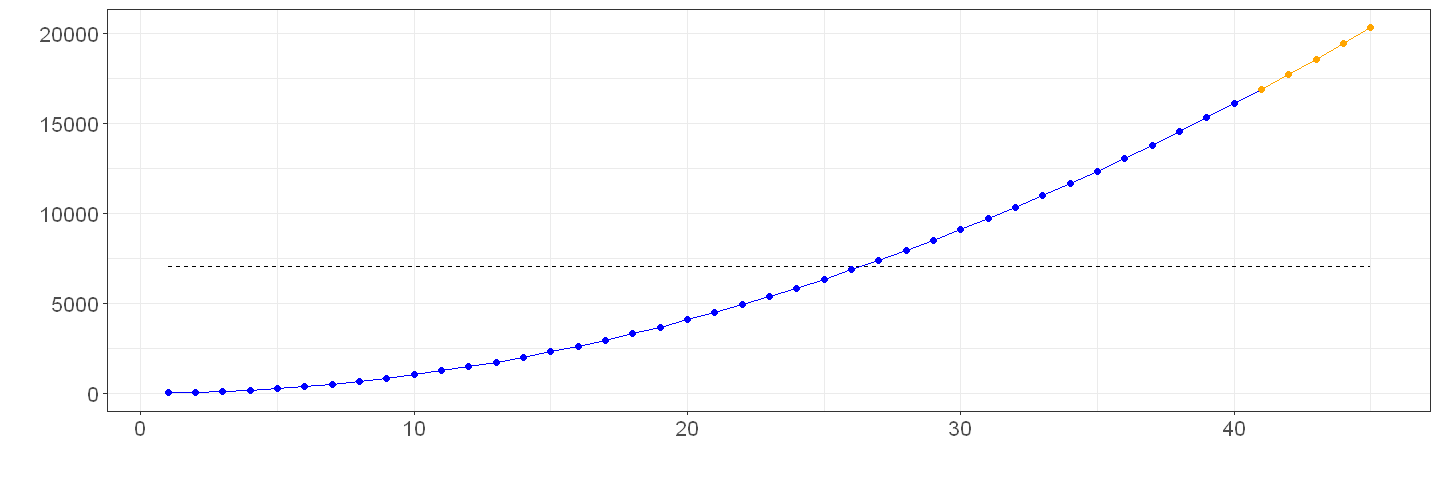

In [36]:
options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs + 2
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

**(c)** The trend dominates the series.

**(d)**   See (b).


Call:
arima(x = Y[1:40], order = c(0, 2, 2), xreg = (1:40)^2, method = "ML")

Coefficients:
          ma1     ma2  (1:40)^2
      -0.9545  0.1008   10.1051
s.e.   0.1703  0.2218    0.0148

sigma^2 estimated as 1.006:  log likelihood = -54.74,  aic = 117.47


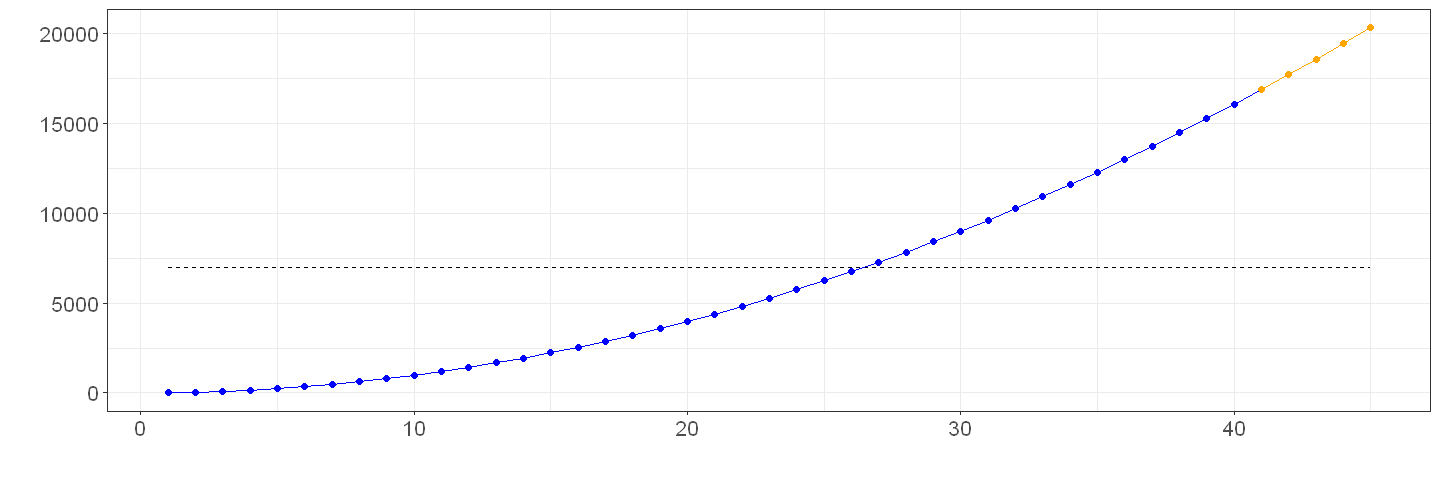

In [37]:
set.seed(2020)
Y = arima.sim(model=list(ma=c(-1, 0.75), order=c(0, 2, 2)), n=45)[-2:-1] + 10 * (1:45)**2

model = arima(Y[1:40], order=c(0, 2, 2), xreg=(1:40)**2, method='ML')
print(model)

pred = predict(model, n.ahead=5, se.fit=TRUE, newxreg=(41:45)**2)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs + 2
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

Again the trend dominates the series.

If, for illustration, we were to use a much smaller trend $\theta_0 = 0.01$:


Call:
arima(x = Y[1:40], order = c(0, 2, 2), xreg = (1:40)^2, method = "ML")

Coefficients:
          ma1     ma2  (1:40)^2
      -1.1198  0.1198    0.0230
s.e.   0.1821  0.1464    0.0051

sigma^2 estimated as 0.6407:  log likelihood = -47.42,  aic = 102.85


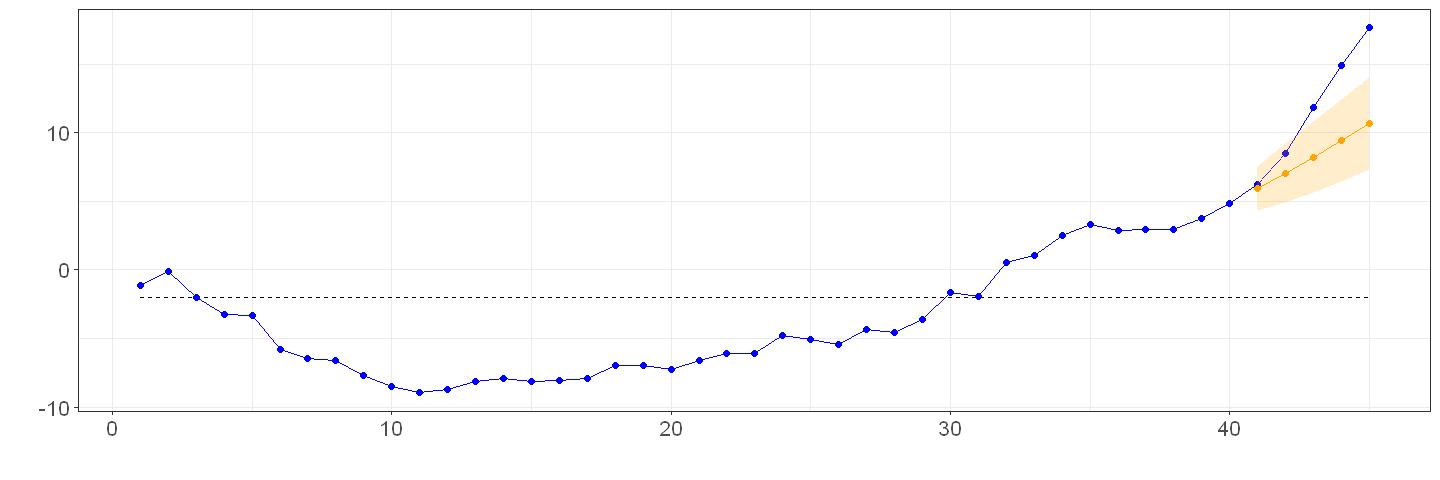

In [38]:
set.seed(5000)
Y = arima.sim(model=list(ma=c(-1, 0.75), order=c(0, 2, 2)), n=45)[-2:-1] + 0.01 * (1:45)**2

model = arima(Y[1:40], order=c(0, 2, 2), xreg=(1:40)**2, method='ML')
print(model)

pred = predict(model, n.ahead=5, se.fit=TRUE, newxreg=(41:45)**2)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs + 2
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

The series grows far faster than predicted by the forecast, falling outside of the prediction interval.

**Exercise 9.18**.  Consider the model $Y_t = \beta_0 + \beta_1 t + X_t$, where $X_t = \phi X_{t-1} + e_t$. We assume that $\beta_0$, $\beta_1$, and $\phi$ are known. Show that the minimum mean square error forecast $\ell$ steps ahead can be written as $\hat{Y}_t(\ell) = \beta_0 + \beta_1 (t + \ell) + \phi^\ell(Y_t - \beta_0 - \beta_1 t)$.

**Solution**.  The minimum mean square error forecast for the $X$ series is $\hat{X}_t(\ell) = \phi^\ell X_t$.  But

$$ 
\begin{align}
\hat{Y}_t(\ell) &= \text{E}[\beta_0 + \beta_1(t + \ell) + X_{t + \ell} | Y_1, Y_2, \dots, Y_t] \\
&= \beta_0 + \beta_1 (t + \ell) + \text{E}[X_{t + \ell} |  Y_1, Y_2, \dots, Y_t] \\
&= \beta_0 + \beta_1 (t + \ell) + \text{E}[X_{t + \ell} |  X_1, X_2, \dots, X_t] \\
&= \beta_0 + \beta_1 (t + \ell) + \phi^\ell X_t \\
&= \beta_0 + \beta_1 (t + \ell) + \phi^\ell (Y_t - \beta_0 - \beta_1 t)
\end{align}
$$

**Exercise 9.19**.  Verify Equation (9.3.16) on page 196.

**Solution**.  Equation (9.3.16) states that, for an AR(1) process,

$$ \text{Var}[e_{t}(\ell)] = \sigma_e^2 \left[ \frac{1 - \phi^{2l}}{1 - \phi^2} \right] \tag{9.3.16} $$

But we have, from Equation (9.3.5),

$$ \text{Var}[e_{t}(\ell)] = \sigma_e^2 \sum_{j=0}^{\ell - 1} \psi_j^2 \tag{9.3.5}$$

and for the AR(1) process, the psi-weights are $\psi_j = \phi^j$, so doing the finite geometric sum on $\phi^2$ we get the result":

$$ \text{Var}[e_{t}(\ell)] = \sigma_e^2 \sum_{j=0}^{\ell - 1} \phi^{2j} = \sigma_e^2 \left[ \frac{1 - \phi^{2l}}{1 - \phi^2} \right] $$

**Exercise 9.20**.  Verify Equation (9.3.32) on page 200.

**Solution**.  Equation (9.3.32) states that, for an ARMA(1, 1) process,

$$ \hat{Y}_t(\ell) = \mu + \phi^\ell (Y_t - \mu) - \phi^{\ell - 1} \theta e_t \quad \text{for } \ell \geq 1 \tag{9.3.32}$$

(Note the added $\theta$, missing in the original equation.)

This follows by induction from the forecast step for the demeaned series $X_t = Y_t - \mu$ being

$$ \hat{Y}_t(1) - \mu = \phi(Y_t - \mu) - \theta e_t 
\quad \text{and} \quad
\hat{Y}_t(\ell) - \mu = \phi(\hat{Y}_t(\ell - 1) - \mu) \quad \text{for } \ell \geq 2
$$

that is, the demeaned series forecast being the AR component minus the error for the current term, for the 1 lag forecast, and just  the previous forecast multiplied by the AR component for further lags.  The base case is the forecast above for lag 1, and the induction step is, for $\ell \geq 2$,

$$
\begin{align}
\hat{Y}_t(\ell) - \mu &= \phi (\hat{Y}_t(\ell - 1) - \mu) \\
&= \phi ( \phi^{\ell - 1} (Y_t - \mu) - \phi^{\ell - 2} \theta e_t ) \\
&= \phi^\ell (Y_t - \mu) - \phi^{\ell - 1} \theta e_t
\end{align}
$$

Now, to prove the forecast stept result:

$$ 
\begin{align}
\hat{Y}_t(1) - \mu &= \text{E}[Y_{t+1} - \mu | Y_t, \dots, Y_1] \\
&= \text{E}[X_{t+1} | X_t, \dots, X_1] \\
&= \phi X_t - \theta e_t \\
&= \phi (Y_t - \mu) - \theta e_t
\end{align}
$$

and, for $\ell \geq 2$,

$$ 
\begin{align}
\hat{Y}_t(\ell) - \mu &= \text{E}[Y_{t+\ell} - \mu | Y_t, \dots, Y_1] \\
&= \text{E}[X_{t+\ell} | X_t, \dots, X_1] \\
&= \phi X_t - \theta \text{E}[e_{t+\ell-1} | X_t, \dots, X_1]\\
&= \phi X_t = \phi (Y_t - \mu)
\end{align}
$$
